In [1]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader

from itertools import cycle
from tqdm.auto import trange

from matplotlib import cm
import matplotlib.pyplot as plt

from utils import plot_utils, s3w_utils, vmf_utils, utils
from methods import s3w, ssw, sw

from experiments import gd_sphere

from scipy.stats import gaussian_kde

device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

# Gradient Descent

In [2]:
mu_target = [0,1,0]
mu_target = mu_target / np.linalg.norm(mu_target)
kappa_target = 10
X_target = torch.tensor(vmf_utils.rand_vmf(mu_target, kappa=kappa_target, N=10000), dtype=torch.float)

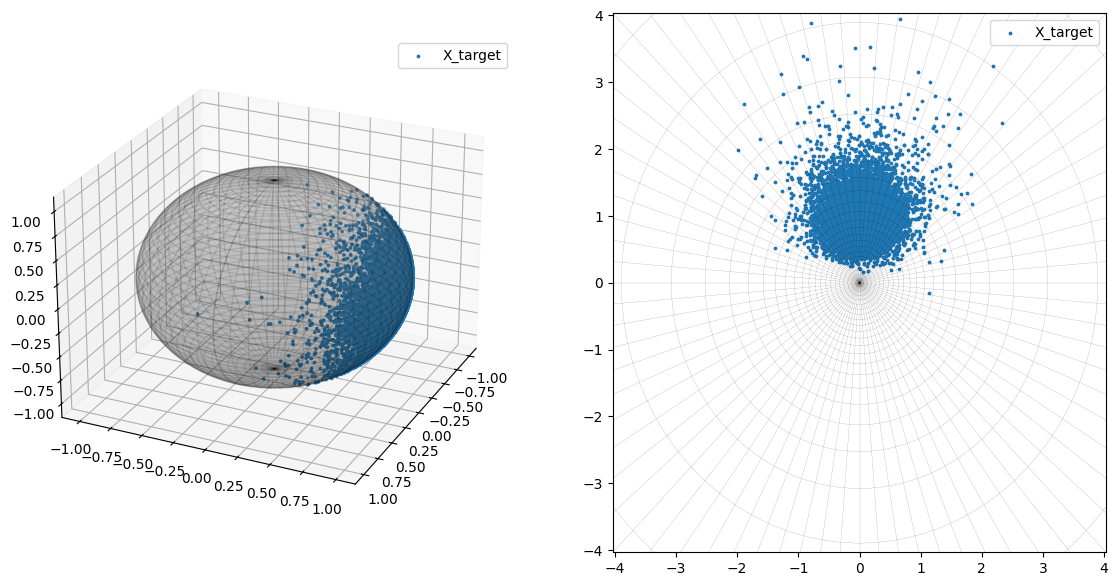

In [3]:
plot_utils.plot_all([X_target], ['X_target'], view_init=(25,25))

In [4]:
X0 = torch.randn((500, 3), device=device)
X0 = F.normalize(X0, p=2, dim=-1)
X0.requires_grad_(True)
L = [X0.clone()]
L_loss = []

In [5]:
d_func = ssw.sswd 
d_args = {'p': 2, 'num_projections': 1000, 'device': device}
L1, L1_loss = gd_sphere.run_exp(X_target, X0, d_func, d_args, device, n_steps=1001, lr=100)

100%|████████████████████████████████████████████████████| 1001/1001 [01:30<00:00, 11.07it/s, loss = 0.000]


In [9]:
d_func = s3w.s3wd 
d_args = {'p': 2, 'n_projs': 1000, 'device': device}
L, L_loss = gd_sphere.run_exp(X_target, X0, d_func, d_args, device, n_steps=1001, lr=1.0)

100%|██████████████████████████████████████████████████| 1001/1001 [00:03<00:00, 299.93it/s, loss = 11.445]


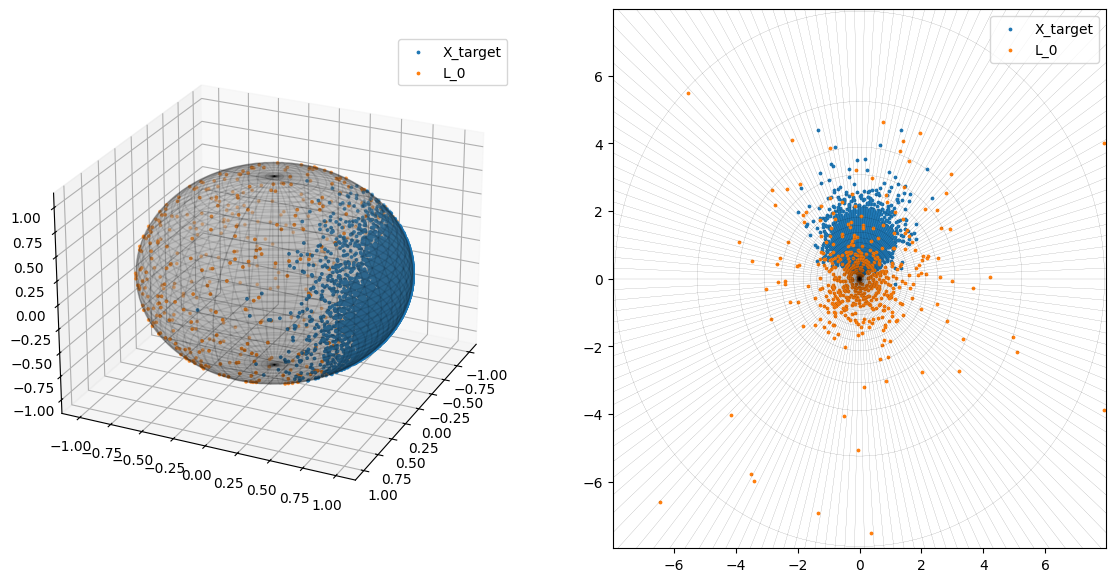

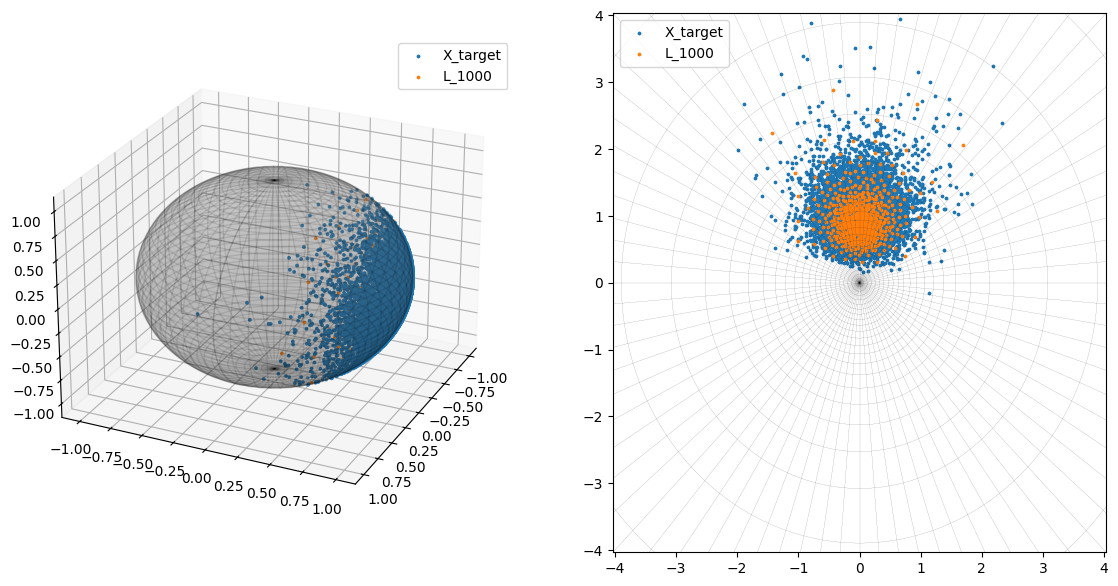

In [7]:
for k in [0, 1000]:
    X_target_cpu = X_target.cpu().detach().numpy()
    L1_k_cpu = L1[k].cpu().detach().numpy()

    datasets = [X_target_cpu, L1_k_cpu]
    labels = ['X_target', f'L_{k}']

    plot_utils.plot_all(datasets, labels, view_init=(25, 25))

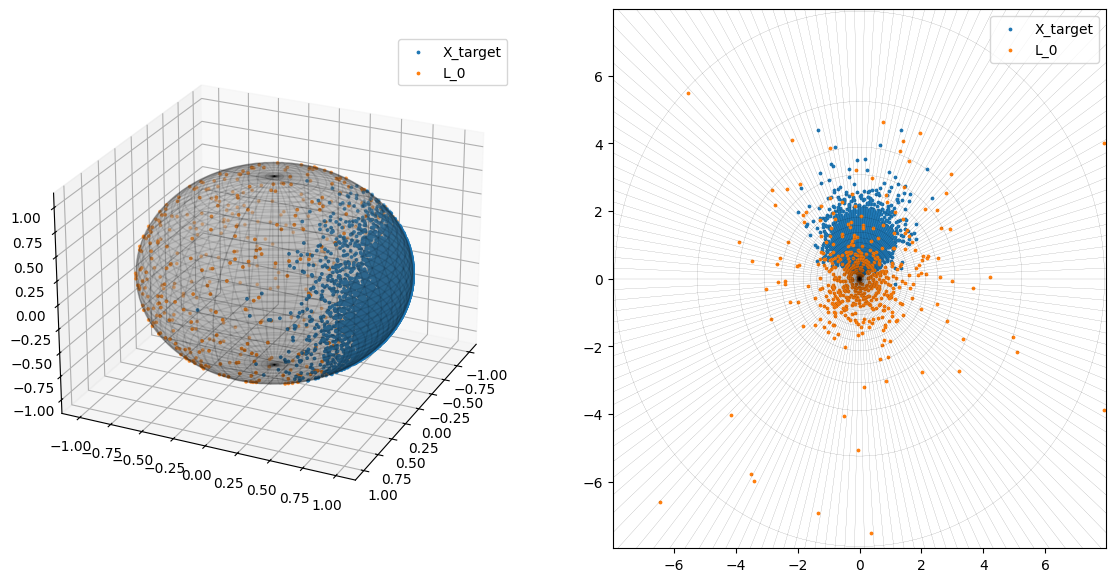

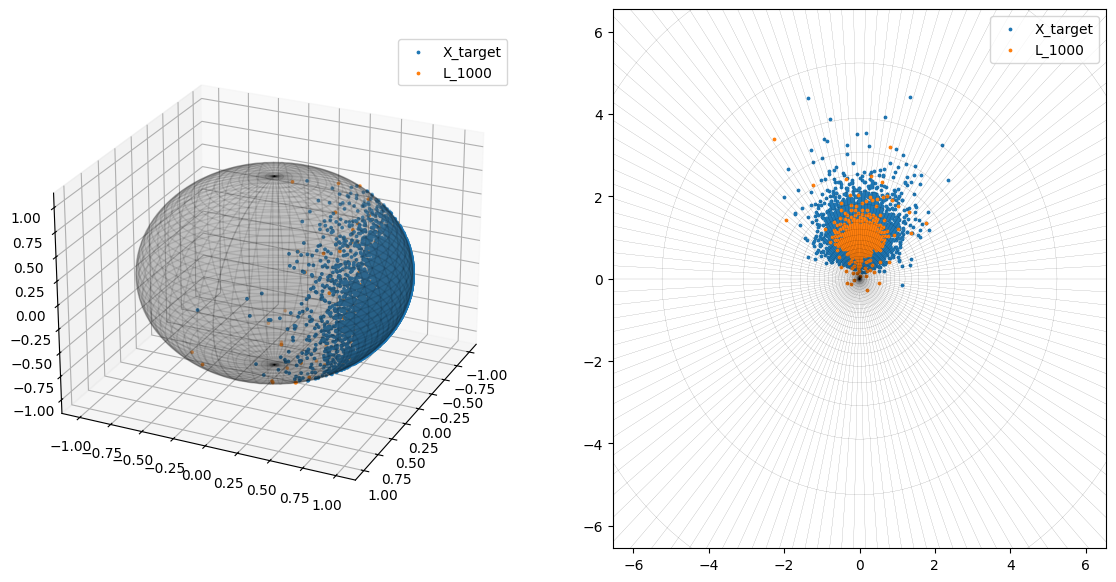

In [10]:
for k in [0, 1000]:
    X_target_cpu = X_target.cpu().detach().numpy()
    L_k_cpu1 = L[k].cpu().detach().numpy()

    datasets = [X_target_cpu, L_k_cpu1]
    labels = ['X_target', f'L_{k}']

    plot_utils.plot_all(datasets, labels, view_init=(25, 25))